In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoLocator, MaxNLocator
from scipy import stats
import datetime as dt

In [2]:
def abline(slope, intercept, axis, color, label):
    x_vals = np.array(axis.get_xlim())
    y_vals = intercept + slope * x_vals
    axis.plot(x_vals, y_vals, c=color, label=label)

In [3]:
artemis_data = pd.read_csv('inputs/Artemis_SWMF_Input_2012.txt', sep='\s+', header=None, names=['year', 'month', 'day', 'hour', 'minute', 'second', 'ms', 'Bx', 'By', 'Bz', 'Vx', 'Vy', 'Vz', 'N', 'T'])
artemis_data['Date'] = pd.to_datetime(artemis_data[['year', 'month', 'day', 'hour', 'minute', 'second', 'ms']])
artemis_data.drop(['year', 'month', 'day', 'hour', 'minute', 'second', 'ms'], axis=1, inplace=True)

omni_data = pd.read_csv('inputs/Omni_SWMF_Input_2012.txt', sep='\s+', header=None, names=['year', 'month', 'day', 'hour', 'minute', 'second', 'ms', 'Bx', 'By', 'Bz', 'Vx', 'Vy', 'Vz', 'N', 'T'])
omni_data['Date'] = pd.to_datetime(omni_data[['year', 'month', 'day', 'hour', 'minute', 'second', 'ms']])
omni_data.drop(['year', 'month', 'day', 'hour', 'minute', 'second', 'ms'], axis=1, inplace=True)

In [4]:
target_date = dt.datetime(2012, 11, 13, 12, 0, 0)
index = artemis_data.index[artemis_data['Date'] == target_date][0]
pearson_corr, _ = stats.pearsonr(artemis_data['Bz'][index:], omni_data['Bz'][index:])

In [8]:
artemis_data_bad = pd.read_csv('../2022-05-27/inputs/Artemis_SWMF_Input_2022.txt', sep='\s+', header=None, names=['year', 'month', 'day', 'hour', 'minute', 'second', 'ms', 'Bx', 'By', 'Bz', 'Vx', 'Vy', 'Vz', 'N', 'T'])
artemis_data_bad['Date'] = pd.to_datetime(artemis_data_bad[['year', 'month', 'day', 'hour', 'minute', 'second', 'ms']])
artemis_data_bad.drop(['year', 'month', 'day', 'hour', 'minute', 'second', 'ms'], axis=1, inplace=True)

omni_data_bad = pd.read_csv('../2022-05-27/inputs/Omni_SWMF_Input_2022.txt', sep='\s+', header=None, names=['year', 'month', 'day', 'hour', 'minute', 'second', 'ms', 'Bx', 'By', 'Bz', 'Vx', 'Vy', 'Vz', 'N', 'T'])
omni_data_bad['Date'] = pd.to_datetime(omni_data_bad[['year', 'month', 'day', 'hour', 'minute', 'second', 'ms']])
omni_data_bad.drop(['year', 'month', 'day', 'hour', 'minute', 'second', 'ms'], axis=1, inplace=True)

In [9]:
target_date_bad = dt.datetime(2022, 5, 27, 12, 0, 0)
index_bad = artemis_data_bad.index[artemis_data_bad['Date'] == target_date_bad][0]
pearson_corr_bad, _ = stats.pearsonr(artemis_data_bad['Bz'][index_bad:], omni_data_bad['Bz'][index_bad:])

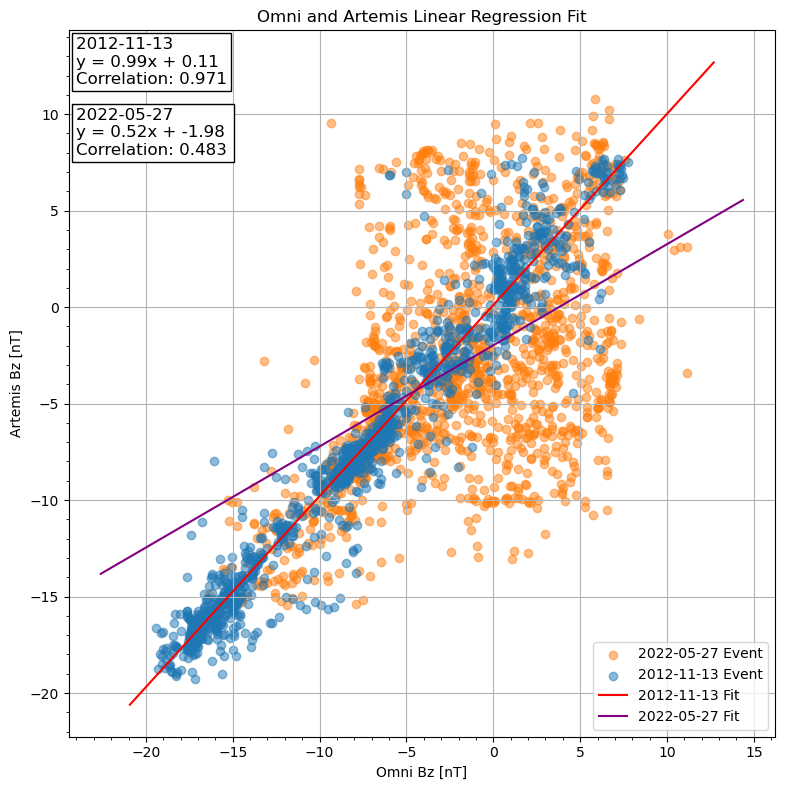

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))

ax.set_box_aspect(1)

ax.scatter(omni_data_bad['Bz'][index_bad:], artemis_data_bad['Bz'][index_bad:], label='2022-05-27 Event', alpha=0.5, c='C1')
ax.scatter(omni_data['Bz'][index:], artemis_data['Bz'][index:], label='2012-11-13 Event', alpha=0.5, c='C0')


statistics = stats.linregress(omni_data['Bz'][index:], artemis_data['Bz'][index:])
abline(statistics[0], statistics[1], ax, color='red', label='2012-11-13 Fit')

statistics_bad = stats.linregress(omni_data_bad['Bz'][index_bad:], artemis_data_bad['Bz'][index_bad:])
abline(statistics_bad[0], statistics_bad[1], ax, color='purple', label='2022-05-27 Fit')

equation_text = f'2012-11-13 \ny = {statistics.slope:.2f}x + {statistics.intercept:.2f} \nCorrelation: {round(pearson_corr, 3)}'
ax.text(0.01, 0.99, equation_text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black', pad=3))\

equation_text_bad = f'2022-05-27 \ny = {statistics_bad.slope:.2f}x + {statistics_bad.intercept:.2f} \nCorrelation: {round(pearson_corr_bad, 3)}'
ax.text(0.01, 0.89, equation_text_bad, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black', pad=3))


ax.set(xlabel='Omni Bz [nT]', ylabel='Artemis Bz [nT]', title='Omni and Artemis Linear Regression Fit')

ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.legend(loc='lower right')
ax.grid(visible=True, which='major', axis='both', c='0.7')

plt.tight_layout()
plt.savefig('plots/OvsA_linregress.jpg')

In [4]:
SYMH = pd.read_csv('2012-11-13_SYMH.txt', delimiter='\s+')
SYMH['Date'] = pd.to_datetime(SYMH['DATE']+' '+SYMH['TIME'], format="%Y-%m-%d %H:%M:%S.%f")
SYMH.drop(['DATE', 'TIME'], axis=1, inplace=True)

AE = pd.read_csv('2012-11-13_AE.txt', delimiter='\s+')
AE['Date'] = pd.to_datetime(AE['DATE']+' '+AE['TIME'], format="%Y-%m-%d %H:%M:%S.%f")
AE.drop(['DATE', 'TIME'], axis=1, inplace=True)
#parse_dates=['DATE', 'TIME'], date_format=['%Y-%m-%d', '%H:%M:%S.%f']

In [5]:
Omni_AE = pd.read_csv('Omni_SWMF_AE_2012.txt', sep='\s+', header=None, comment='#', usecols=[0,1,2,3,4,34], names=['year', 'month', 'day', 'hour', 'minute', 'AE'])
Omni_AE['Date'] = pd.to_datetime(Omni_AE[['year', 'month', 'day', 'hour', 'minute']])
Omni_AE.drop(['year', 'month', 'day', 'hour', 'minute'], axis=1, inplace=True)

Artemis_AE = pd.read_csv('Artemis_SWMF_AE_2012.txt', sep='\s+', header=None, comment='#', usecols=[0,1,2,3,4,34], names=['year', 'month', 'day', 'hour', 'minute', 'AE'])
Artemis_AE['Date'] = pd.to_datetime(Artemis_AE[['year', 'month', 'day', 'hour', 'minute']])
Artemis_AE.drop(['year', 'month', 'day', 'hour', 'minute'], axis=1, inplace=True)


Omni_SYMH = pd.read_csv('Omni_SWMF_SYMH_2012.txt', sep='\s+', header=None,comment='#', usecols=[0,1,2,3,4,7], names=['year', 'month', 'day', 'hour', 'minute', 'DST'])
Omni_SYMH['Date'] = pd.to_datetime(Omni_SYMH[['year', 'month', 'day', 'hour', 'minute']])
Omni_SYMH.drop(['year', 'month', 'day', 'hour', 'minute'], axis=1, inplace=True)

Artemis_SYMH = pd.read_csv('Artemis_SWMF_SYMH_2012.txt', sep='\s+', header=None,comment='#', usecols=[0,1,2,3,4,7], names=['year', 'month', 'day', 'hour', 'minute', 'DST'])
Artemis_SYMH['Date'] = pd.to_datetime(Artemis_SYMH[['year', 'month', 'day', 'hour', 'minute']])
Artemis_SYMH.drop(['year', 'month', 'day', 'hour', 'minute'], axis=1, inplace=True)

Omni_Currents = pd.read_csv('OMNI_SWMF_Diss_2012.txt', sep='\s+', header=None,comment='#', usecols=[0,1,2,3,4,7,13], names=['year', 'month', 'day', 'hour', 'minute', 'current', 'diss'])
Omni_Currents['Date'] = pd.to_datetime(Omni_Currents[['year', 'month', 'day', 'hour', 'minute']])
Omni_Currents.drop(['year', 'month', 'day', 'hour', 'minute'], axis=1, inplace=True)

Artemis_Currents = pd.read_csv('Artemis_SWMF_Diss_2012.txt', sep='\s+', header=None,comment='#', usecols=[0,1,2,3,4,7,13], names=['year', 'month', 'day', 'hour', 'minute', 'current', 'diss'])
Artemis_Currents['Date'] = pd.to_datetime(Artemis_Currents[['year', 'month', 'day', 'hour', 'minute']])
Artemis_Currents.drop(['year', 'month', 'day', 'hour', 'minute'], axis=1, inplace=True)

In [6]:
Artemis_Currents.drop_duplicates(inplace=True)
Omni_Currents.drop_duplicates(inplace=True)

In [22]:
SYMH_badevent = pd.read_csv('../2022-05-27/2022-05-27_SYMH.txt', delimiter='\s+')
SYMH_badevent['Date'] = pd.to_datetime(SYMH_badevent['DATE']+' '+SYMH_badevent['TIME'], format="%Y-%m-%d %H:%M:%S.%f")
SYMH_badevent.drop(['DATE', 'TIME'], axis=1, inplace=True)

AE_badevent = pd.read_csv('../2022-05-27/2022-05-27_AE.csv', delimiter=',', header=0)
AE_badevent['Date'] = pd.to_datetime(AE_badevent['Date_UTC'], format='%Y-%m-%d %H:%M:%S')
AE_badevent.drop(['Date_UTC'], axis=1, inplace=True)

In [26]:
Omni_AE_badevent = pd.read_csv('../2022-05-27/Omni_SWMF_AE_2022.txt', sep='\s+', header=None, comment='#', usecols=[0,1,2,3,4,34], names=['year', 'month', 'day', 'hour', 'minute', 'AE'])
Omni_AE_badevent['Date'] = pd.to_datetime(Omni_AE_badevent[['year', 'month', 'day', 'hour', 'minute']])
Omni_AE_badevent.drop(['year', 'month', 'day', 'hour', 'minute'], axis=1, inplace=True)

Artemis_AE_badevent = pd.read_csv('../2022-05-27/Artemis_SWMF_AE_2022.txt', sep='\s+', header=None, comment='#', usecols=[0,1,2,3,4,34], names=['year', 'month', 'day', 'hour', 'minute', 'AE'])
Artemis_AE_badevent['Date'] = pd.to_datetime(Artemis_AE_badevent[['year', 'month', 'day', 'hour', 'minute']])
Artemis_AE_badevent.drop(['year', 'month', 'day', 'hour', 'minute'], axis=1, inplace=True)

Omni_SYMH_badevent = pd.read_csv('../2022-05-27/Omni_SWMF_SYMH_2022.txt', sep='\s+', header=None,comment='#', usecols=[0,1,2,3,4,7], names=['year', 'month', 'day', 'hour', 'minute', 'DST'])
Omni_SYMH_badevent['Date'] = pd.to_datetime(Omni_SYMH_badevent[['year', 'month', 'day', 'hour', 'minute']])
Omni_SYMH_badevent.drop(['year', 'month', 'day', 'hour', 'minute'], axis=1, inplace=True)

Artemis_SYMH_badevent = pd.read_csv('../2022-05-27/Artemis_SWMF_SYMH_2022.txt', sep='\s+', header=None,comment='#', usecols=[0,1,2,3,4,7], names=['year', 'month', 'day', 'hour', 'minute', 'DST'])
Artemis_SYMH_badevent['Date'] = pd.to_datetime(Artemis_SYMH_badevent[['year', 'month', 'day', 'hour', 'minute']])
#Artemis_SYMH.drop(['year', 'month', 'day', 'hour', 'minute'], axis=1, inplace=True)

Omni_Currents_badevent = pd.read_csv('../2022-05-27/Omni_SWMF_Diss_2022.txt', sep='\s+', header=None,comment='#', usecols=[0,1,2,3,4,7,13], names=['year', 'month', 'day', 'hour', 'minute', 'current', 'diss'])
Omni_Currents_badevent['Date'] = pd.to_datetime(Omni_Currents_badevent[['year', 'month', 'day', 'hour', 'minute']])
Omni_Currents_badevent.drop(['year', 'month', 'day', 'hour', 'minute'], axis=1, inplace=True)

Artemis_Currents_badevent = pd.read_csv('../2022-05-27/Artemis_SWMF_Diss_2022.txt', sep='\s+', header=None,comment='#', usecols=[0,1,2,3,4,7,13], names=['year', 'month', 'day', 'hour', 'minute', 'current', 'diss'])
Artemis_Currents_badevent['Date'] = pd.to_datetime(Artemis_Currents_badevent[['year', 'month', 'day', 'hour', 'minute']])
Artemis_Currents_badevent.drop(['year', 'month', 'day', 'hour', 'minute'], axis=1, inplace=True)

In [28]:
Artemis_Currents_badevent.drop_duplicates(inplace=True)
Omni_Currents_badevent.drop_duplicates(inplace=True)

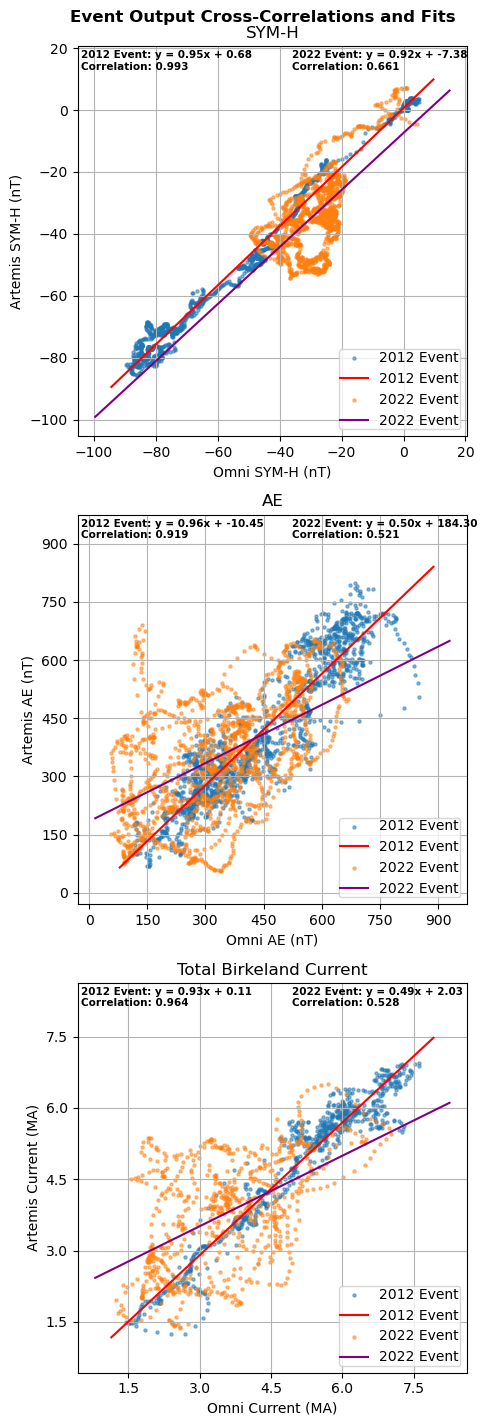

In [37]:
x1=[Omni_SYMH['DST'][60:], Omni_AE['AE'][60:], Omni_Currents['current'][30:]]
y1=[Artemis_SYMH['DST'][60:], Artemis_AE['AE'][60:], Artemis_Currents['current'][30:]]

x2=[Omni_SYMH_badevent['DST'][60:], Omni_AE_badevent['AE'][60:], Omni_Currents_badevent['current'][30:]]
y2=[Artemis_SYMH_badevent['DST'][60:], Artemis_AE_badevent['AE'][60:], Artemis_Currents_badevent['current'][30:]]


colors = ['C0', 'C0', 'C0']
titles=['SYM-H', 'AE', 'Total Birkeland Current']
xlabels = ['Omni SYM-H (nT)', 'Omni AE (nT)', 'Omni Current (MA)']
ylabels = ['Artemis SYM-H (nT)', 'Artemis AE (nT)', 'Artemis Current (MA)']

fig, axs = plt.subplots(3, 1, figsize=(5.5, 14.5))

for i, ax in enumerate(axs):
    ax.set_box_aspect(1)

    ax.scatter(x1[i], y1[i], s=5, alpha=0.5, label='2012 Event')
    statistics1 = stats.linregress(x1[i], y1[i])
    abline(statistics1[0], statistics1[1], ax, color='red', label='2012 Event')

    ax.scatter(x2[i], y2[i], s=5, alpha=0.5, label='2022 Event')
    statistics2 = stats.linregress(x2[i], y2[i])
    abline(statistics2[0], statistics2[1], ax, color='purple', label='2022 Event')


    min_limit = min(ax.get_xlim() + ax.get_ylim())
    max_limit = max(ax.get_xlim() + ax.get_ylim())
    ax.set_xlim(min_limit, max_limit)
    ax.set_ylim(min_limit, max_limit)
    ax.xaxis.set_major_locator(MaxNLocator(8))
    ax.yaxis.set_major_locator(MaxNLocator(8))
    ax.grid(visible=True, which='major', axis='both', c='0.7')

    equation_text1 = f'2012 Event: y = {statistics1.slope:.2f}x + {statistics1.intercept:.2f} \nCorrelation: {round(statistics1.rvalue, 3)}'
    ax.text(0.01, 0.99, equation_text1, transform=ax.transAxes, fontsize=7.5, weight='bold', verticalalignment='top')

    equation_text2 = f'2022 Event: y = {statistics2.slope:.2f}x + {statistics2.intercept:.2f} \nCorrelation: {round(statistics2.rvalue, 3)}'
    ax.text(0.55, 0.99, equation_text2, transform=ax.transAxes, fontsize=7.5, weight='bold', verticalalignment='top')

    ax.set(title=titles[i], xlabel=xlabels[i], ylabel=ylabels[i])
    ax.legend(loc='lower right', borderpad=0.1)


plt.suptitle('Event Output Cross-Correlations and Fits', weight='bold')
plt.tight_layout()
plt.savefig('plots/indexstats-modelouts-both.jpg', dpi=300)

In [8]:
with open('ampere-2012.txt', 'r') as f:
    header_row = f.readline().strip().split(', ')
ampere = pd.read_csv('ampere-2012.txt', delimiter='\s+', skiprows=1, names=header_row)
ampere.reset_index(drop=True, inplace=True)

ampere['Date'] = pd.to_datetime(ampere[['year', 'month', 'day', 'hour', 'minute']])
ampere.drop(['year', 'month', 'day', 'hour', 'minute'], axis=1, inplace=True)

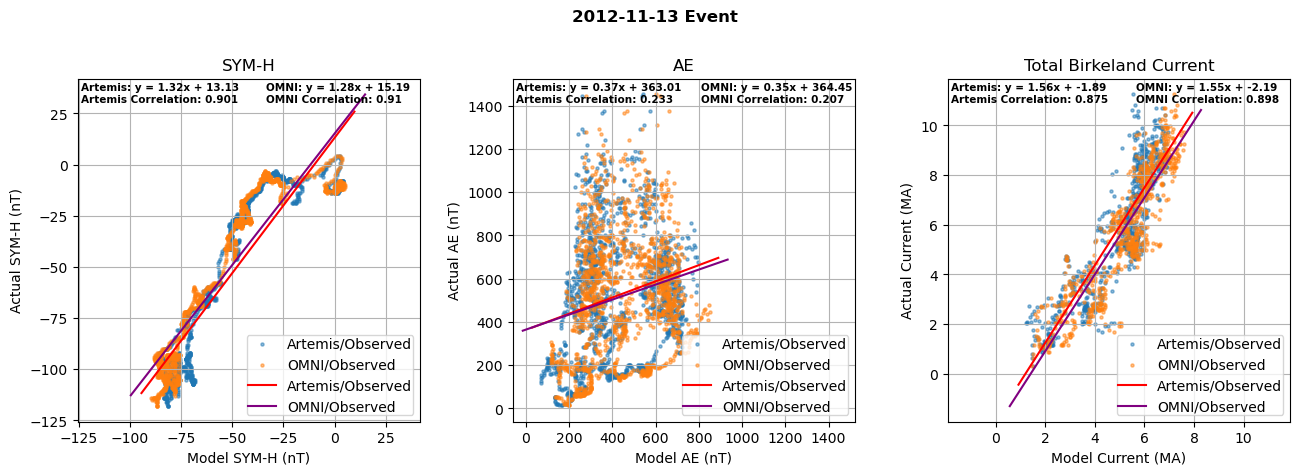

In [86]:
x1=[Omni_SYMH['DST'][60:-1], Omni_AE['AE'][60:-1], Omni_Currents['current'][30:]]
x2=[Artemis_SYMH['DST'][60:-1], Artemis_AE['AE'][60:-1], Artemis_Currents['current'][30:]]
y=[SYMH['SYM-H'], AE['AE'], -1* ampere['I total down North [MA]']]

titles=['SYM-H', 'AE', 'Total Birkeland Current']
xlabels = ['Model SYM-H (nT)', 'Model AE (nT)', 'Model Current (MA)']
ylabels = ['Actual SYM-H (nT)', 'Actual AE (nT)', 'Actual Current (MA)']


fig, axs = plt.subplots(1, 3, figsize=(13.2,4.8))

for i, ax in enumerate(axs):
    ax.set_box_aspect(1)
    ax.scatter(x2[i], y[i], s=5, alpha=0.5, label='Artemis/Observed')
    ax.scatter(x1[i], y[i], s=5, alpha=0.5, label='OMNI/Observed')

    statistics_a = stats.linregress(x2[i], y[i])
    abline(statistics_a[0], statistics_a[1], ax, color='red', label='Artemis/Observed')

    statistics_o = stats.linregress(x1[i], y[i])
    abline(statistics_o[0], statistics_o[1], ax, color='purple', label='OMNI/Observed')

    min_limit = min(ax.get_xlim() + ax.get_ylim())
    max_limit = max(ax.get_xlim() + ax.get_ylim())
    ax.set_xlim(min_limit, max_limit)
    ax.set_ylim(min_limit, max_limit)
    ax.xaxis.set_major_locator(MaxNLocator(8))
    ax.yaxis.set_major_locator(MaxNLocator(8))
    ax.grid(visible=True, which='major', axis='both', c='0.7')

    equation_text1 = f'Artemis: y = {statistics_a.slope:.2f}x + {statistics_a.intercept:.2f} \nArtemis Correlation: {round(statistics_a.rvalue, 3)}'
    ax.text(0.01, 0.99, equation_text1, transform=ax.transAxes, fontsize=7.5, weight='bold', verticalalignment='top')

    equation_text2 = f'OMNI: y = {statistics_o.slope:.2f}x + {statistics_o.intercept:.2f} \nOMNI Correlation: {round(statistics_o.rvalue, 3)}'
    ax.text(0.55, 0.99, equation_text2, transform=ax.transAxes, fontsize=7.5, weight='bold', verticalalignment='top')

    ax.set(title=titles[i], xlabel=xlabels[i], ylabel=ylabels[i])
    ax.legend(loc='lower right', borderpad=0.1)


plt.suptitle('2012-11-13 Event', weight='bold')
plt.tight_layout()
plt.savefig('plots/indexstats.jpg', dpi=300)